# Oregon Department of Forestry Wildfire Occurances, 2000 - 2022

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_1908/268959863.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
odf_df = pd.read_csv('/Users/shirleyaraizasantaella/Documents/UMich/Grad School Year 2/Semester_2/SI_507_IntermediateProgramming/SI-607/ODF Project/ODF_Fire_Occurrence_Data_2000-2022_20240323.csv')

In [3]:
odf_df.head(5)

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013


In [4]:
odf_df.columns

Index(['Serial', 'FireCategory', 'FireYear', 'Area', 'DistrictName',
       'UnitName', 'FullFireNumber', 'FireName', 'Size_class', 'EstTotalAcres',
       'Protected_Acres', 'HumanOrLightning', 'CauseBy', 'GeneralCause',
       'SpecificCause', 'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD',
       'FO_LandOwnType', 'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation',
       'County', 'RegUseZone', 'RegUseRestriction', 'Industrial_Restriction',
       'Ign_DateTime', 'ReportDateTime', 'Discover_DateTime',
       'Control_DateTime', 'CreationDate', 'ModifiedDate', 'DistrictCode',
       'UnitCode', 'DistFireNumber'],
      dtype='object')

In [5]:
odf_df['GeneralCause'].unique()

array(['Lightning', 'Smoking', 'Recreation', 'Debris Burning',
       'Equipment Use', 'Miscellaneous', 'Arson', 'Under Invest',
       'Juveniles', 'Railroad'], dtype=object)

In [6]:
odf_df['SpecificCause'].unique()

array(['Lightning', 'Other - Smoker Related', 'Fireworks',
       'Other - Burning Related', 'Powerlines - prior to 2017',
       'Other - Miscellaneous Related', 'Hot Ashes (Dumping of)',
       'Warming Fire', 'Carbon Sparks from Vehicle',
       'Burning Vehicle or Equipment', 'Rubbish Disposal',
       'Other - Arson Related', 'Discarded Cigarette/Tobacco', nan,
       'Firearms - General', 'Other - Recreationist Related',
       'Unattended', 'Campfire Not Extinguished', 'Inadequate Mop Up',
       'Inadequate Resources to Control',
       'Other -Equipment Use Related (ie. road const., other i.c.e.)',
       'Industrial- Rotary Saw - Sparks or Friction',
       'Warming Fire Not Extinguished', 'Burning Building',
       'Sparks from Farm Machinery', 'Inadequate clearing',
       'Industrial- Cable System', 'Burning During Poor Condition',
       'Cutting, Welding, or Grinding',
       'Playing With Fire (Juveniles 12 years and under)',
       'Landowner Electrical Service',
     

In [7]:
odf_df['County'].unique()

array(['Grant', 'Union', 'Jackson', 'Benton', 'Polk', 'Wallowa',
       'Klamath', 'Clatsop', 'Douglas', 'Josephine', 'Lane', 'Linn',
       'Columbia', 'Deschutes', 'Clackamas', 'Lake', 'Coos', 'Washington',
       'Wheeler', 'Marion', 'Yamhill', 'Baker', 'Umatilla', 'Tillamook',
       'Crook', 'Jefferson', 'Multnomah', 'Curry', 'Lincoln', 'Morrow',
       'Hood River', 'Wasco', 'Harney', 'Malheur', 'Gilliam',
       'Other State', 'ERROR: #N/A'], dtype=object)

In [8]:
odf_df['DistrictName'].unique()

array(['Central Oregon', 'Northeast Oregon', 'Southwest Oregon',
       'West Oregon', 'Walker Range - WRFPA', 'Astoria', 'Klamath-Lake',
       'Douglas - DFPA', 'South Cascade', 'Forest Grove', 'North Cascade',
       'Coos - CFPA', 'Western Lane', 'Tillamook'], dtype=object)

In [9]:
odf_df['FireName']

0         Slick Ear #2
1              Woodley
2        QUEENS BRANCH
3                 WREN
4         Ritner Creek
             ...      
23485        Road 2430
23486      Spruce Path
23487      Bone Canyon
23488     Milepost 231
23489     That Way 774
Name: FireName, Length: 23490, dtype: object

# Load information from the census through an API Call

In [10]:
#API Request:

url = "https://api.census.gov/data/2019/acs/acs5"
params = {
    "get": "NAME,B01001_001E",
    "for": "county:*",
    "in": "state:41"
}

response = requests.get(url, params=params)
data = response.json()
print(data)

[['NAME', 'B01001_001E', 'state', 'county'], ['Lane County, Oregon', '373340', '41', '039'], ['Washington County, Oregon', '589481', '41', '067'], ['Clatsop County, Oregon', '39102', '41', '007'], ['Jackson County, Oregon', '216574', '41', '029'], ['Grant County, Oregon', '7189', '41', '023'], ['Clackamas County, Oregon', '410463', '41', '005'], ['Tillamook County, Oregon', '26389', '41', '057'], ['Josephine County, Oregon', '86251', '41', '033'], ['Umatilla County, Oregon', '77129', '41', '059'], ['Columbia County, Oregon', '51375', '41', '009'], ['Wasco County, Oregon', '26130', '41', '065'], ['Union County, Oregon', '26337', '41', '061'], ['Marion County, Oregon', '339641', '41', '047'], ['Douglas County, Oregon', '109114', '41', '019'], ['Jefferson County, Oregon', '23607', '41', '031'], ['Polk County, Oregon', '83037', '41', '053'], ['Deschutes County, Oregon', '186251', '41', '017'], ['Linn County, Oregon', '125048', '41', '043'], ['Yamhill County, Oregon', '104831', '41', '071']

In [11]:
census_df = pd.DataFrame(data[1:], columns=data[0])
print(census_df.head())

                        NAME B01001_001E state county
0        Lane County, Oregon      373340    41    039
1  Washington County, Oregon      589481    41    067
2     Clatsop County, Oregon       39102    41    007
3     Jackson County, Oregon      216574    41    029
4       Grant County, Oregon        7189    41    023


In [12]:
census_df['NAME'] = census_df['NAME'].str.split(' County', expand=True)[0]

In [13]:
print(census_df)

          NAME B01001_001E state county
0         Lane      373340    41    039
1   Washington      589481    41    067
2      Clatsop       39102    41    007
3      Jackson      216574    41    029
4        Grant        7189    41    023
5    Clackamas      410463    41    005
6    Tillamook       26389    41    057
7    Josephine       86251    41    033
8     Umatilla       77129    41    059
9     Columbia       51375    41    009
10       Wasco       26130    41    065
11       Union       26337    41    061
12      Marion      339641    41    047
13     Douglas      109114    41    019
14   Jefferson       23607    41    031
15        Polk       83037    41    053
16   Deschutes      186251    41    017
17        Linn      125048    41    043
18     Yamhill      104831    41    071
19       Baker       16019    41    001
20     Klamath       66921    41    035
21     Lincoln       48547    41    041
22      Benton       91107    41    003
23       Crook       23011    41    013


In [14]:
census_df = census_df.rename(columns={
    'NAME': 'CountyName',
    'Population': 'Population',
    'state': 'StateCode',
    'county': 'CountyCode'
})

In [15]:
census_df.head()

,CountyName,B01001_001E,StateCode,CountyCode
0,Lane,373340,41,039
1,Washington,589481,41,067
2,Clatsop,39102,41,007
3,Jackson,216574,41,029
4,Grant,7189,41,023


In [16]:
#check for missing values 
odf_df.isnull().sum()

Serial                        0
FireCategory                  0
FireYear                      0
Area                          0
DistrictName                  0
UnitName                      0
FullFireNumber                0
FireName                      0
Size_class                    0
EstTotalAcres                79
Protected_Acres               0
HumanOrLightning              0
CauseBy                     128
GeneralCause                  0
SpecificCause               224
Cause_Comments            13685
Lat_DD                       10
Long_DD                      10
LatLongDD                    10
FO_LandOwnType                0
Twn                          12
Rng                          15
Sec                          12
Subdiv                       31
LandmarkLocation           1282
County                        0
RegUseZone                   50
RegUseRestriction            89
Industrial_Restriction       89
Ign_DateTime                 94
ReportDateTime                0
Discover

In [17]:
census_df.to_csv('updated_county_data.csv', index=False)

In [18]:
#check for formats
odf_df.dtypes

Serial                      int64
FireCategory               object
FireYear                    int64
Area                       object
DistrictName               object
UnitName                   object
FullFireNumber             object
FireName                   object
Size_class                 object
EstTotalAcres             float64
Protected_Acres           float64
HumanOrLightning           object
CauseBy                    object
GeneralCause               object
SpecificCause              object
Cause_Comments             object
Lat_DD                    float64
Long_DD                   float64
LatLongDD                  object
FO_LandOwnType             object
Twn                        object
Rng                        object
Sec                       float64
Subdiv                     object
LandmarkLocation           object
County                     object
RegUseZone                 object
RegUseRestriction          object
Industrial_Restriction     object
Ign_DateTime  

Combine census and odf

In [19]:
census_county_df = pd.read_csv('updated_county_data.csv')
odf_df = pd.read_csv('ODF_Fire_Occurrence_Data_2000-2022_20240323.csv')

fire_census_df = pd.merge(census_county_df, odf_df, left_on='CountyName', right_on='County', how='inner')

In [20]:
print(fire_census_df.head(2))

  CountyName  B01001_001E  StateCode  CountyCode  Serial FireCategory  \
0       Lane       373340         41          39   84987         STAT   
1       Lane       373340         41          39  102163         STAT   

   FireYear Area   DistrictName      UnitName  ...     Industrial_Restriction  \
0      2009  SOA  South Cascade  Eastern Lane  ...     Lvl 2 Limited Shutdown   
1      2015  SOA   Western Lane        Veneta  ...  Lvl 3 Restricted Shutdown   

             Ign_DateTime          ReportDateTime       Discover_DateTime  \
0  08/17/2009 11:48:00 AM  08/17/2009 11:52:00 AM  08/17/2009 11:50:00 AM   
1  08/12/2015 04:30:00 PM  08/12/2015 04:45:00 PM  08/12/2015 04:45:00 PM   

         Control_DateTime            CreationDate            ModifiedDate  \
0  08/17/2009 12:16:00 PM  08/17/2009 12:00:00 AM  10/06/2009 02:10:00 PM   
1  08/12/2015 08:00:00 PM  08/16/2015 12:00:00 AM  08/16/2015 02:25:00 PM   

  DistrictCode UnitCode DistFireNumber  
0           77      771        

In [21]:
fire_census_df.to_csv('fire_census_data.csv', index=False)

# Interactive Map of all Fires since 2000 in Oregon, with filter based on year and county

In [22]:
import geopandas as gpd
import folium

In [23]:
print(fire_census_df.columns)

Index(['CountyName', 'B01001_001E', 'StateCode', 'CountyCode', 'Serial',
       'FireCategory', 'FireYear', 'Area', 'DistrictName', 'UnitName',
       'FullFireNumber', 'FireName', 'Size_class', 'EstTotalAcres',
       'Protected_Acres', 'HumanOrLightning', 'CauseBy', 'GeneralCause',
       'SpecificCause', 'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD',
       'FO_LandOwnType', 'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation',
       'County', 'RegUseZone', 'RegUseRestriction', 'Industrial_Restriction',
       'Ign_DateTime', 'ReportDateTime', 'Discover_DateTime',
       'Control_DateTime', 'CreationDate', 'ModifiedDate', 'DistrictCode',
       'UnitCode', 'DistFireNumber'],
      dtype='object')


In [24]:
import shapely
from shapely.geometry import Point

fire_census_df['geometry'] = fire_census_df.apply(lambda row: Point(float(row.Long_DD), float(row.Lat_DD)), axis=1)
geo_data = gpd.GeoDataFrame(fire_census_df, geometry='geometry')

# Set the coordinate reference system (CRS) for longitude/latitude
geo_data.set_crs(epsg=4326, inplace=True)

,CountyName,B01001_001E,StateCode,CountyCode,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,...,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber,geometry
0,Lane,373340,41,39,84987,STAT,2009,SOA,South Cascade,Eastern Lane,...,08/17/2009 11:48:00 AM,08/17/2009 11:52:00 AM,08/17/2009 11:50:00 AM,08/17/2009 12:16:00 PM,08/17/2009 12:00:00 AM,10/06/2009 02:10:00 PM,77,771,076,POINT (-122.80972 43.92972)
1,Lane,373340,41,39,102163,STAT,2015,SOA,Western Lane,Veneta,...,08/12/2015 04:30:00 PM,08/12/2015 04:45:00 PM,08/12/2015 04:45:00 PM,08/12/2015 08:00:00 PM,08/16/2015 12:00:00 AM,08/16/2015 02:25:00 PM,78,781,044,POINT (-123.16889 44.00833)
2,Lane,373340,41,39,109019,STAT,2017,SOA,Western Lane,Veneta,...,09/01/2017 09:00:00 AM,09/01/2017 10:53:00 AM,09/01/2017 10:45:00 AM,09/01/2017 12:00:00 PM,09/01/2017 12:00:00 AM,09/01/2017 01:09:00 PM,78,781,047,POINT (-124.10917 43.91917)
3,Lane,373340,41,39,114074,STAT,2019,SOA,South Cascade,Eastern Lane,...,05/29/2019 02:00:00 PM,05/29/2019 02:15:00 PM,05/29/2019 02:14:00 PM,05/29/2019 02:17:00 PM,05/30/2019 12:00:00 AM,05/30/2019 09:38:00 AM,77,771,173,POINT (-122.20814 44.16958)
4,Lane,373340,41,39,62022,STAT,2001,SOA,Western Lane,Veneta,...,08/22/2001 08:00:00 PM,08/23/2001 08:15:00 AM,08/23/2001 08:00:00 AM,08/23/2001 09:15:00 AM,08/23/2001 12:54:00 PM,09/24/2001 11:12:00 AM,78,781,026,POINT (-124.07148 44.03288)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23467,Multnomah,804606,41,51,127585,STAT,2021,NOA,North Cascade,Molalla,...,08/25/2021 06:00:00 PM,08/26/2021 10:10:00 AM,08/26/2021 10:00:00 AM,08/26/2021 05:00:00 PM,08/29/2021 12:00:00 AM,04/29/2022 03:50:00 PM,58,581,027,POINT (-121.95478 45.63175)
23468,Multnomah,804606,41,51,90302,STAT,2012,NOA,Forest Grove,Forest Grove,...,02/04/2012 04:30:00 PM,02/04/2012 06:30:00 PM,02/04/2012 06:00:00 PM,02/04/2012 07:30:00 PM,02/04/2012 12:00:00 AM,02/10/2012 04:32:00 PM,53,531,098,POINT (-122.92333 45.64500)
23469,Multnomah,804606,41,51,132439,STAT,2022,NOA,North Cascade,Molalla,...,09/27/2022 01:10:00 PM,09/27/2022 01:10:00 PM,09/27/2022 01:10:00 PM,09/27/2022 02:47:00 PM,09/29/2022 12:00:00 AM,10/09/2022 12:11:00 PM,58,581,054,POINT (-122.24792 45.50692)
23470,Multnomah,804606,41,51,132397,STAT,2022,NOA,North Cascade,Molalla,...,09/25/2022 04:45:00 PM,09/25/2022 04:55:00 PM,09/25/2022 04:45:00 PM,09/25/2022 04:55:00 PM,09/26/2022 12:00:00 AM,10/01/2022 12:15:00 PM,58,581,053,POINT (-121.97017 45.62678)


In [25]:
map = folium.Map(location=[44.0, -120.5], zoom_start=7)

for idx, row in geo_data.iterrows():
    # Check if the point is not empty
    if not row['geometry'].is_empty:
        folium.Marker(
            location=[row['geometry'].y, row['geometry'].x],
            popup=f"Fire Name: {row['FireName']}<br>Year: {row['FireYear']}<br>Size: {row['EstTotalAcres']} acres",
            icon=folium.Icon(color='red', icon='fire')
        ).add_to(map)
    else:
        print(f"Skipping empty geometry for index {idx}")

map.save('oregon_wildfires.html')

Skipping empty geometry for index 2131
Skipping empty geometry for index 2136
Skipping empty geometry for index 8048
Skipping empty geometry for index 11289
Skipping empty geometry for index 16195
Skipping empty geometry for index 19267


In [ ]:
from shapely.geometry import Point
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output

fire_census_df = pd.read_csv('fire_census_data.csv')

# Create GeoDataFrame
fire_census_df['geometry'] = fire_census_df.apply(lambda row: Point(float(row.Long_DD), float(row.Lat_DD)), axis=1)
geo_data = gpd.GeoDataFrame(fire_census_df, geometry='geometry')
geo_data.set_crs(epsg=4326, inplace=True)

# Create dropdowns for Year and County
year_dropdown = widgets.Dropdown(
    options=sorted(geo_data['FireYear'].unique()),
    description='Year:',
    disabled=False,
)

county_dropdown = widgets.Dropdown(
    options=['All'] + sorted(geo_data['CountyName'].unique().tolist()),
    description='County:',
    disabled=False,
)



Dropdown(description='Year:', index=21, options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2…

Dropdown(description='County:', index=3, options=('All', 'Baker', 'Benton', 'Clackamas', 'Clatsop', 'Columbia'…

In [27]:
def display_map(year, county):
    clear_output(wait=True)
    display(year_dropdown, county_dropdown)
    # Filter data
    filtered_data = geo_data[(geo_data['FireYear'] == year)]
    if county != 'All':
        filtered_data = filtered_data[filtered_data['CountyName'] == county]

    # Create map
    folium_map = folium.Map(location=[44.0, -120.5], zoom_start=7)
    for idx, row in filtered_data.iterrows():
        if not row['geometry'].is_empty:
            folium.Marker(
                [row['geometry'].y, row['geometry'].x],
                popup=(
                    f"Fire Name: {row['FireName']}<br>"
                    f"Year: {row['FireYear']}<br>"
                    f"Size: {row['EstTotalAcres']} acres"
                ),
                icon=folium.Icon(color='red', icon='fire')
            ).add_to(folium_map)

    # Display the map in the notebook
    display(folium_map)


In [28]:
def on_dropdown_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        display_map(year_dropdown.value, county_dropdown.value) 

In [29]:
year_dropdown.observe(on_dropdown_change, names='value')
county_dropdown.observe(on_dropdown_change, names='value')

In [65]:
display(year_dropdown, county_dropdown)
display_map(year_dropdown.value, county_dropdown.value)

Dropdown(description='Year:', index=21, options=(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2…

Dropdown(description='County:', index=3, options=('All', 'Baker', 'Benton', 'Clackamas', 'Clatsop', 'Columbia'…

# Network of fires, starting with averaging key variables of interest

In [31]:
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [32]:
#make a copy of fire_census_df
fire_census_copy = fire_census_df.copy()

In [33]:
fire_census_copy.columns

Index(['CountyName', 'B01001_001E', 'StateCode', 'CountyCode', 'Serial',
       'FireCategory', 'FireYear', 'Area', 'DistrictName', 'UnitName',
       'FullFireNumber', 'FireName', 'Size_class', 'EstTotalAcres',
       'Protected_Acres', 'HumanOrLightning', 'CauseBy', 'GeneralCause',
       'SpecificCause', 'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD',
       'FO_LandOwnType', 'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation',
       'County', 'RegUseZone', 'RegUseRestriction', 'Industrial_Restriction',
       'Ign_DateTime', 'ReportDateTime', 'Discover_DateTime',
       'Control_DateTime', 'CreationDate', 'ModifiedDate', 'DistrictCode',
       'UnitCode', 'DistFireNumber', 'geometry'],
      dtype='object')

In [34]:
average_fire_size_by_county = fire_census_copy.groupby('CountyName')['EstTotalAcres'].mean().round(3)

print(average_fire_size_by_county)

CountyName
Baker          829.985
Benton           2.149
Clackamas      165.204
Clatsop          2.978
Columbia         1.016
Coos             2.514
Crook            7.877
Curry         1032.544
Deschutes      114.797
Douglas         80.376
Gilliam         51.267
Grant          435.862
Harney        5866.078
Hood River     135.962
Jackson         69.072
Jefferson      880.630
Josephine      441.760
Klamath        216.010
Lake          1465.568
Lane           137.882
Lincoln         12.809
Linn             2.776
Malheur        831.372
Marion        1171.002
Morrow          15.804
Multnomah     1253.814
Polk             5.173
Tillamook        3.383
Umatilla       105.301
Union           21.890
Wallowa       1038.363
Wasco          433.537
Washington       2.829
Wheeler        360.251
Yamhill          2.393
Name: EstTotalAcres, dtype: float64


In [35]:
average_protected_acres_by_county = fire_census_copy.groupby('CountyName')['Protected_Acres'].mean().round(3)
average_protected_acres_by_county

CountyName
Baker         128.101
Benton          1.690
Clackamas      67.063
Clatsop         2.926
Columbia        1.005
Coos            2.506
Crook           3.801
Curry          67.044
Deschutes      25.506
Douglas        41.876
Gilliam        51.267
Grant         122.353
Harney        145.388
Hood River      7.354
Jackson        39.292
Jefferson      64.658
Josephine      39.303
Klamath        83.302
Lake          330.047
Lane           74.267
Lincoln        10.288
Linn            2.783
Malheur         6.132
Marion        455.638
Morrow         13.211
Multnomah      34.543
Polk            4.852
Tillamook       3.347
Umatilla       50.950
Union          10.146
Wallowa        72.699
Wasco         109.887
Washington      2.372
Wheeler        68.597
Yamhill         2.171
Name: Protected_Acres, dtype: float64

In [36]:
human_lightning_by_county = fire_census_copy.groupby('CountyName')['HumanOrLightning'].apply(lambda x: x.mode()[0])
human_lightning_by_county


CountyName
Baker         Lightning
Benton            Human
Clackamas         Human
Clatsop           Human
Columbia          Human
Coos              Human
Crook         Lightning
Curry             Human
Deschutes         Human
Douglas           Human
Gilliam       Lightning
Grant         Lightning
Harney        Lightning
Hood River        Human
Jackson           Human
Jefferson     Lightning
Josephine         Human
Klamath           Human
Lake          Lightning
Lane              Human
Lincoln           Human
Linn              Human
Malheur       Lightning
Marion            Human
Morrow        Lightning
Multnomah         Human
Polk              Human
Tillamook         Human
Umatilla      Lightning
Union         Lightning
Wallowa       Lightning
Wasco             Human
Washington        Human
Wheeler       Lightning
Yamhill           Human
Name: HumanOrLightning, dtype: object

In [37]:
cause_by_county = fire_census_copy.groupby('CountyName')['CauseBy'].apply(lambda x: x.mode()[0])
cause_by_county

CountyName
Baker               Lightning
Benton        Ruralist-Paying
Clackamas     Ruralist-Paying
Clatsop         Recreationist
Columbia      Ruralist-Paying
Coos          Ruralist-Paying
Crook               Lightning
Curry           Recreationist
Deschutes     Ruralist-Paying
Douglas             Lightning
Gilliam             Lightning
Grant               Lightning
Harney              Lightning
Hood River      Recreationist
Jackson             Lightning
Jefferson           Lightning
Josephine     Ruralist-Paying
Klamath             Lightning
Lake                Lightning
Lane            Recreationist
Lincoln         Recreationist
Linn            Recreationist
Malheur             Lightning
Marion        Ruralist-Paying
Morrow              Lightning
Multnomah            Motorist
Polk          Ruralist-Paying
Tillamook       Recreationist
Umatilla            Lightning
Union               Lightning
Wallowa             Lightning
Wasco         Ruralist-Paying
Washington    Ruralist-Paying

In [38]:
general_cause_by_county = fire_census_copy.groupby('CountyName')['GeneralCause'].apply(lambda x: x.mode()[0])
general_cause_by_county

CountyName
Baker              Lightning
Benton         Equipment Use
Clackamas     Debris Burning
Clatsop       Debris Burning
Columbia      Debris Burning
Coos          Debris Burning
Crook              Lightning
Curry         Debris Burning
Deschutes          Lightning
Douglas        Equipment Use
Gilliam            Lightning
Grant              Lightning
Harney             Lightning
Hood River     Equipment Use
Jackson            Lightning
Jefferson          Lightning
Josephine      Equipment Use
Klamath            Lightning
Lake               Lightning
Lane           Equipment Use
Lincoln           Recreation
Linn           Equipment Use
Malheur            Lightning
Marion        Debris Burning
Morrow             Lightning
Multnomah      Equipment Use
Polk          Debris Burning
Tillamook         Recreation
Umatilla           Lightning
Union              Lightning
Wallowa            Lightning
Wasco         Debris Burning
Washington    Debris Burning
Wheeler            Lightning
Yam

In [39]:
# Convert to datetime if necessary
fire_census_copy['Ign_DateTime'] = pd.to_datetime(fire_census_copy['Ign_DateTime'])
fire_census_copy['Control_DateTime'] = pd.to_datetime(fire_census_copy['Control_DateTime'])

# Calculate duration of each fire
fire_census_copy['FireDuration'] = fire_census_copy['Control_DateTime'] - fire_census_copy['Ign_DateTime']

# Calculate average fire duration by county
average_fire_duration_by_county = fire_census_copy.groupby('CountyName')['FireDuration'].mean()

print(average_fire_duration_by_county)

CountyName
Baker         4 days 10:05:09.767441860
Benton        0 days 12:11:28.512396694
Clackamas     3 days 13:18:45.794813979
Clatsop      15 days 03:50:56.619718309
Columbia      0 days 12:59:34.550561797
Coos          9 days 03:04:40.433369447
Crook         4 days 09:51:58.932384341
Curry                  16 days 06:32:24
Deschutes     6 days 17:03:16.802973977
Douglas      10 days 12:53:23.919089759
Gilliam                 2 days 17:18:00
Grant         5 days 09:33:17.355932203
Harney                  7 days 19:50:12
Hood River    2 days 19:56:42.098360655
Jackson      12 days 17:42:35.043452202
Jefferson     6 days 03:03:01.470588235
Josephine     8 days 11:06:16.154729988
Klamath                 9 days 09:49:39
Lake         13 days 04:17:05.915492957
Lane          4 days 04:43:26.272727272
Lincoln       5 days 21:01:21.581027668
Linn          5 days 08:56:02.274881516
Malheur                 5 days 04:19:48
Marion        1 days 19:02:37.478005865
Morrow       50 days 08:55:40

# Create New Data set with all of these averages

In [40]:
data = {

    'AvgAcresBurned': average_fire_size_by_county,
    'AvgProtectedAcres': average_protected_acres_by_county,
    'HumanOrLightning': human_lightning_by_county,
    'GeneralCause': general_cause_by_county,
    'AvgFireDuration': average_fire_duration_by_county
}

In [41]:
networks = pd.DataFrame(data)

In [42]:
networks['GeneralCause'].unique()

array(['Lightning', 'Equipment Use', 'Debris Burning', 'Recreation'],
      dtype=object)

In [43]:
networks.head(3)

,AvgAcresBurned,AvgProtectedAcres,HumanOrLightning,GeneralCause,AvgFireDuration
CountyName,,,,,
Baker,829.985,128.101,Lightning,Lightning,4 days 10:05:09.767441860
Benton,2.149,1.690,Human,Equipment Use,0 days 12:11:28.512396694
Clackamas,165.204,67.063,Human,Debris Burning,3 days 13:18:45.794813979


In [44]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder
# Create two LabelEncoders
le_general_cause = LabelEncoder()
le_human_or_lightning = LabelEncoder()

# Fit and transform the 'GeneralCause' column
networks['GeneralCause'] = le_general_cause.fit_transform(networks['GeneralCause'])

# Fit and transform the 'HumanOrLightning' column
networks['HumanOrLightning'] = le_human_or_lightning.fit_transform(networks['HumanOrLightning'])

# Print the classes for 'GeneralCause'
for i in range(len(le_general_cause.classes_)):
    print(f"GeneralCause: {le_general_cause.inverse_transform([i])[0]} is labeled as {i}")

# Print the classes for 'HumanOrLightning'
for i in range(len(le_human_or_lightning.classes_)):
    print(f"HumanOrLightning: {le_human_or_lightning.inverse_transform([i])[0]} is labeled as {i}")


GeneralCause: Debris Burning is labeled as 0
GeneralCause: Equipment Use is labeled as 1
GeneralCause: Lightning is labeled as 2
GeneralCause: Recreation is labeled as 3
HumanOrLightning: Human is labeled as 0
HumanOrLightning: Lightning is labeled as 1


# Labels for causes after encoding

- GeneralCause: Debris Burning is labeled as 0
- GeneralCause: Equipment Use is labeled as 1
- GeneralCause: Lightning is labeled as 2
- GeneralCause: Recreation is labeled as 3
- HumanOrLightning: Human is labeled as 0
- HumanOrLightning: Lightning is labeled as 1

In [45]:
networks.head(3)

,AvgAcresBurned,AvgProtectedAcres,HumanOrLightning,GeneralCause,AvgFireDuration
CountyName,,,,,
Baker,829.985,128.101,1,2,4 days 10:05:09.767441860
Benton,2.149,1.690,0,1,0 days 12:11:28.512396694
Clackamas,165.204,67.063,0,0,3 days 13:18:45.794813979


In [46]:
updated_county_data = pd.read_csv('updated_county_data.csv')
merged_networks = networks.merge(updated_county_data[['CountyName', 'B01001_001E']], on='CountyName')
merged_networks

,CountyName,AvgAcresBurned,AvgProtectedAcres,HumanOrLightning,GeneralCause,AvgFireDuration,B01001_001E
0,Baker,829.985,128.101,1,2,4 days 10:05:09.767441860,16019
1,Benton,2.149,1.690,0,1,0 days 12:11:28.512396694,91107
2,Clackamas,165.204,67.063,0,0,3 days 13:18:45.794813979,410463
3,Clatsop,2.978,2.926,0,0,15 days 03:50:56.619718309,39102
4,Columbia,1.016,1.005,0,0,0 days 12:59:34.550561797,51375
5,Coos,2.514,2.506,0,0,9 days 03:04:40.433369447,63686
6,Crook,7.877,3.801,1,2,4 days 09:51:58.932384341,23011
7,Curry,1032.544,67.044,0,0,16 days 06:32:24,22650
8,Deschutes,114.797,25.506,0,2,6 days 17:03:16.802973977,186251
9,Douglas,80.376,41.876,0,1,10 days 12:53:23.919089759,109114


In [47]:
merged_networks.to_csv('merged_networks.csv', index=False)

In [48]:
merged_networks.head(3)

,CountyName,AvgAcresBurned,AvgProtectedAcres,HumanOrLightning,GeneralCause,AvgFireDuration,B01001_001E
0,Baker,829.985,128.101,1,2,4 days 10:05:09.767441860,16019
1,Benton,2.149,1.690,0,1,0 days 12:11:28.512396694,91107
2,Clackamas,165.204,67.063,0,0,3 days 13:18:45.794813979,410463


In [49]:
merged_networks.dtypes

CountyName                    object
AvgAcresBurned               float64
AvgProtectedAcres            float64
HumanOrLightning               int64
GeneralCause                   int64
AvgFireDuration      timedelta64[ns]
B01001_001E                    int64
dtype: object

In [50]:
merged_networks = pd.DataFrame(merged_networks)
merged_networks['AvgFireDuration'] = merged_networks['AvgFireDuration'].astype(str)

# Preprocess and convert to timedelta
merged_networks['AvgFireDuration'] = merged_networks['AvgFireDuration'].str.split('.').str[0]
merged_networks['AvgFireDuration'] = pd.to_timedelta(merged_networks['AvgFireDuration'])

# Extract components
merged_networks['DurationDays'] = merged_networks['AvgFireDuration'].dt.days
merged_networks['DurationHours'] = merged_networks['AvgFireDuration'].dt.components.hours
merged_networks['DurationMinutes'] = merged_networks['AvgFireDuration'].dt.components.minutes
merged_networks['DurationSeconds'] = merged_networks['AvgFireDuration'].dt.components.seconds


In [51]:
merged_networks.head(3)

,CountyName,AvgAcresBurned,AvgProtectedAcres,HumanOrLightning,GeneralCause,AvgFireDuration,B01001_001E,DurationDays,DurationHours,DurationMinutes,DurationSeconds
0,Baker,829.985,128.101,1,2,4 days 10:05:09,16019,4,10,5,9
1,Benton,2.149,1.690,0,1,0 days 12:11:28,91107,0,12,11,28
2,Clackamas,165.204,67.063,0,0,3 days 13:18:45,410463,3,13,18,45


In [52]:
#Drop AvgFireDuration column
merged_networks = merged_networks.drop(columns=['AvgFireDuration'])

In [53]:
merged_networks.head(3)

,CountyName,AvgAcresBurned,AvgProtectedAcres,HumanOrLightning,GeneralCause,B01001_001E,DurationDays,DurationHours,DurationMinutes,DurationSeconds
0,Baker,829.985,128.101,1,2,16019,4,10,5,9
1,Benton,2.149,1.690,0,1,91107,0,12,11,28
2,Clackamas,165.204,67.063,0,0,410463,3,13,18,45


In [54]:
merged_networks = pd.read_csv('merged_networks.csv')


In [55]:
merged_networks.dtypes

CountyName            object
AvgAcresBurned       float64
AvgProtectedAcres    float64
HumanOrLightning       int64
GeneralCause           int64
AvgFireDuration       object
B01001_001E            int64
dtype: object

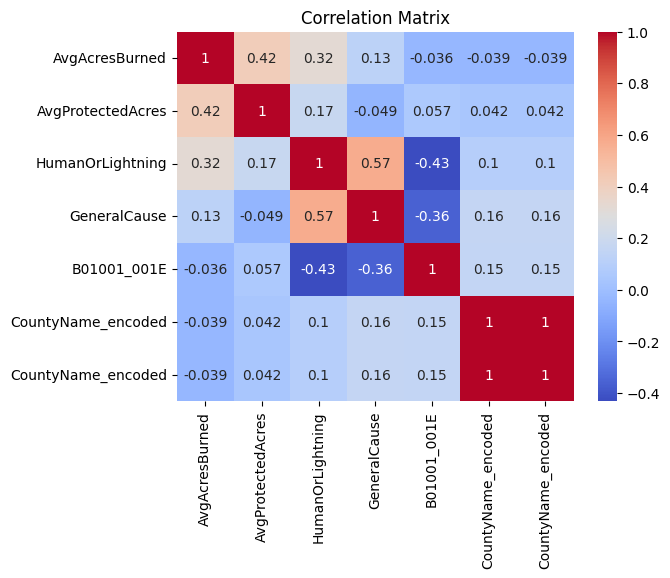

In [56]:
merged_networks['CountyName_encoded'] = pd.factorize(merged_networks['CountyName'])[0]

# Select numeric columns including the new 'CountyName_encoded'
numeric_cols = merged_networks.select_dtypes(include=['float64', 'int64', 'int'])
numeric_cols = pd.concat([numeric_cols, merged_networks[['CountyName_encoded']]], axis=1)

# Recalculate the correlation matrix
corr = numeric_cols.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
print(corr)

                    AvgAcresBurned  AvgProtectedAcres  HumanOrLightning  \
AvgAcresBurned            1.000000           0.418217          0.321030   
AvgProtectedAcres         0.418217           1.000000          0.173225   
HumanOrLightning          0.321030           0.173225          1.000000   
GeneralCause              0.125978          -0.048951          0.573735   
B01001_001E              -0.036414           0.057423         -0.431106   
CountyName_encoded       -0.039005           0.041704          0.099533   
CountyName_encoded       -0.039005           0.041704          0.099533   

                    GeneralCause  B01001_001E  CountyName_encoded  \
AvgAcresBurned          0.125978    -0.036414           -0.039005   
AvgProtectedAcres      -0.048951     0.057423            0.041704   
HumanOrLightning        0.573735    -0.431106            0.099533   
GeneralCause            1.000000    -0.361768            0.157040   
B01001_001E            -0.361768     1.000000         

In [58]:
import numpy as np
import networkx as nx

In [59]:
print(nx.__version__)

3.3


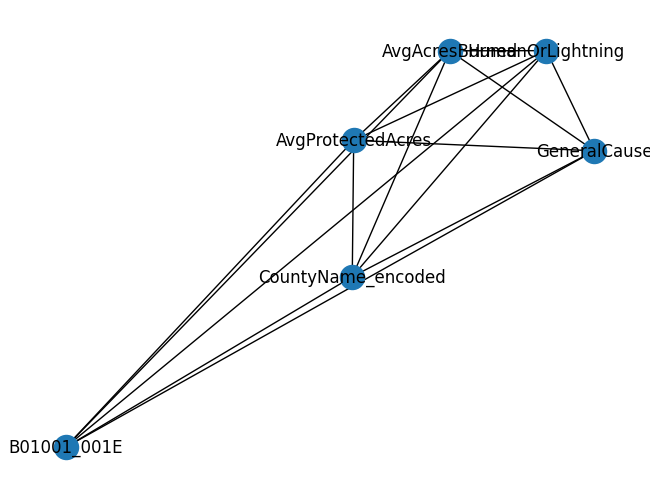

In [60]:
# Convert the correlation matrix DataFrame to a numpy matrix
matrix = corr.values

G = nx.from_numpy_array(matrix)

names = list(corr.index)

# Create a dictionary that maps integer node IDs to their names
mapping = dict(zip(range(len(names)), names))

# Relabel the nodes to their names
G = nx.relabel_nodes(G, mapping)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Create a threshold
threshold = 0.025

# Create a new graph to hold the thresholded network
G_thresholded = nx.Graph()

# Add nodes to the new graph
G_thresholded.add_nodes_from(G)

# Iterate over the edges in the original graph
for u, v, d in G.edges(data=True):
    # Check if the absolute value of the weight is greater than or equal to the threshold
    if abs(d['weight']) >= threshold:
        # If it is, add the edge to the thresholded graph
        G_thresholded.add_edge(u, v, weight=d['weight'])

# Draw the thresholded network
nx.draw(G_thresholded, with_labels=True)

<Figure size 1200x1000 with 0 Axes>

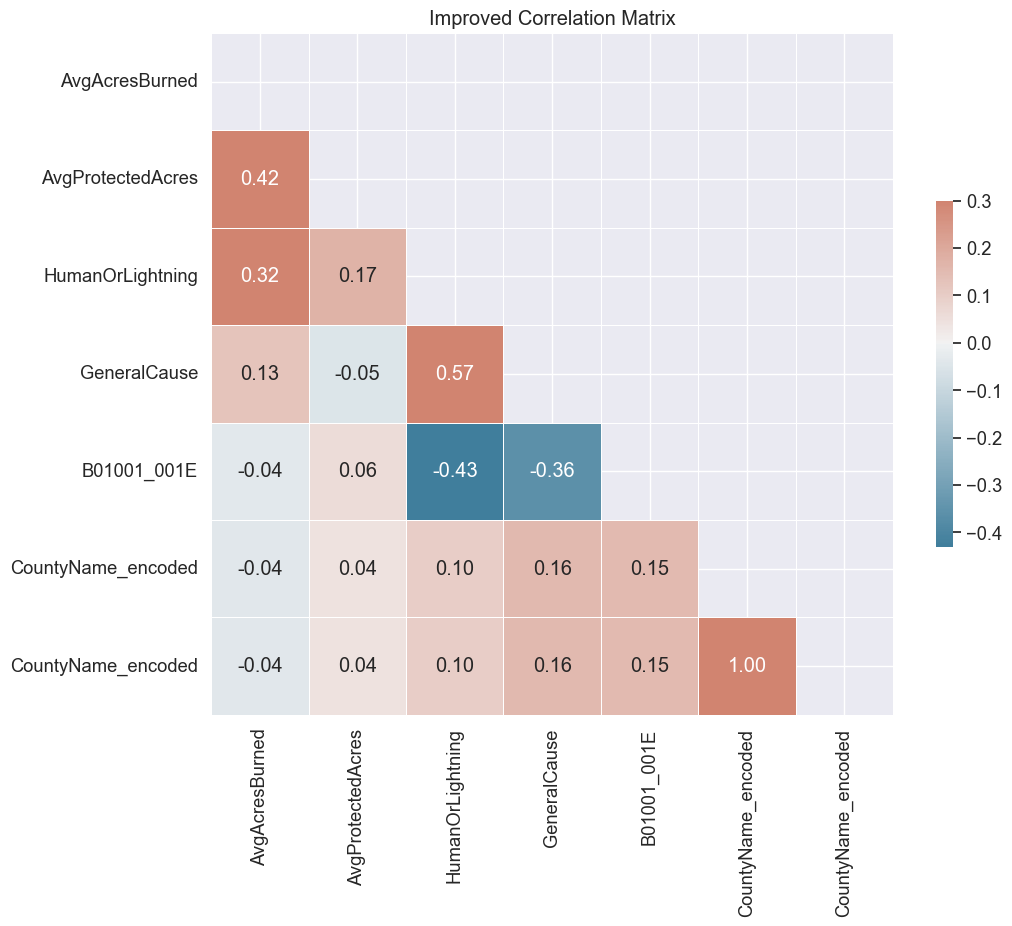

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Bigger figure size
sns.set(font_scale=1.2)  # Increase font size

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Improved Correlation Matrix')
plt.show()

# Loading Climate Data from NOAA

In [62]:
# API Call for NOAA Weather Data
import requests
import json
import csv

#NOAA API Key
api_key = 'tvHSwWrsZQEJUzjeNsVbTbGyqdFwfyyX'

url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'
params = {
    'datasetid': 'GHCND',  # Global Historical Climatology Network Daily
    'locationid': 'FIPS:41',  # Oregon's FIPS code
    'startdate': '2023-01-01',
    'enddate': '2023-01-31',
    'limit': 1000,
    'units': 'standard'
}

headers = {
    'token': api_key
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    try:
        data = response.json()
        records = data.get('results', [])

        # Define CSV file path
        csv_file_path = 'noaa_data.csv'

        # Define the headers based on the JSON structure you expect
        headers = ['station', 'date', 'datatype', 'value', 'attributes']

        # Write to CSV
        with open(csv_file_path, mode='w', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=headers)
            writer.writeheader()
            for record in records:
                writer.writerow(record)

        print(f"Data successfully written to {csv_file_path}")

    except requests.exceptions.JSONDecodeError:
        print("JSON decode error occurred:", response.text)
else:
    print("Failed to retrieve data:", response.status_code, response.text)

Data successfully written to noaa_data.csv


In [ ]:
noaa_data = pd.read_csv('noaa_data.csv')
noaa_data.head(3)

In [ ]:
noaa_data.shape

(1000, 5)